In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold 
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv("sgemm_product.csv")
dataset.shape

(241600, 18)

In [3]:
dataset['AverageRun'] = dataset[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis = 1)

In [4]:
dataset['AverageRun'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: AverageRun, dtype: float64

In [5]:
def scale_columns(dataframe):
    dfSubmean = dataframe - dataframe.mean()
    return dfSubmean / dataframe.std()

In [6]:
x = scale_columns(dataset[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN']])
x[['STRM','STRN','SA','SB']] = dataset[['STRM','STRN','SA','SB']]
x.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,0,0
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,0,1
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,1,0
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,1,1
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,1,0,0


In [7]:
dataset['AverageRun'].median()

69.79

In [8]:
def isGreaterThanMedian(x, median):
    if x > median:
        return 1
    return 0

In [9]:
median = dataset['AverageRun'].median()
target = dataset['AverageRun'].apply(isGreaterThanMedian, args = (median,))

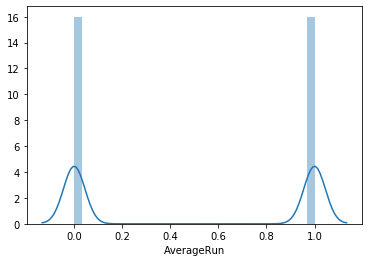

In [10]:
sns.distplot(target)

In [11]:
from keras.utils import to_categorical
y = np.array(target)
y = to_categorical(y)
y.shape

Using TensorFlow backend.


(241600, 2)

In [12]:
x = np.array(x)
x

array([[-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         0.        ,  0.        ],
       [-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         0.        ,  1.        ],
       [-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         1.        ,  1.        ]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=2,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2
2416/2416 [==============================] - 0s 68us/step - loss: 0.6974 - acc: 0.5263
Epoch 2/2
239184/239184 [==============================] - 1s 5us/step
Epoch 1/2
24160/24160 [==============================] - 0s 12us/step - loss: 0.6786 - acc: 0.5956
Epoch 2/2
217440/217440 [==============================] - 1s 6us/step
Epoch 1/2
48320/48320 [==============================] - 1s 13us/step - loss: 0.6448 - acc: 0.7253
Epoch 2/2
193280/193280 [==============================] - 1s 6us/step
Epoch 1/2
72480/72480 [==============================] - 1s 11us/step - loss: 0.5929 - acc: 0.7766
Epoch 2/2
169120/169120 [==============================] - 1s 6us/step
Epoch 1/2
96640/96640 [==============================] - 1s 11us/step - loss: 0.5392 - acc: 0.7972
Epoch 2/2
144960/144960 [==============================] - 1s 5us/step
Epoch 1/2
144960/144960 [==============================] 

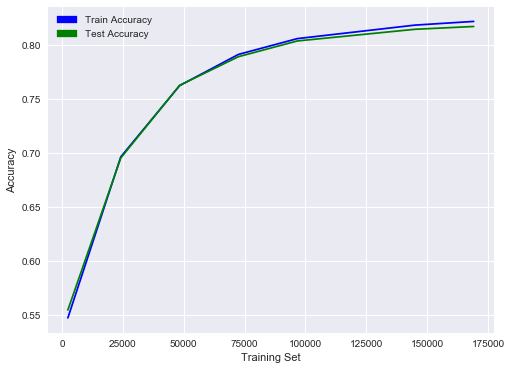

In [15]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with sigmoid activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 2s 12us/step - loss: 0.4696 - acc: 0.8201
Epoch 2/2
43488/43488 [==============================] - 0s 7us/step
Epoch 1/2
173952/173952 [==============================] - 2s 11us/step - loss: 0.4657 - acc: 0.8186
Epoch 2/2
43488/43488 [==============================] - 0s 6us/step
Epoch 1/2
173952/173952 [==============================] - 2s 12us/step - loss: 0.4630 - acc: 0.8170
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 11us/step - loss: 0.4587 - acc: 0.8171
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 11us/step - loss: 0.4534 - acc: 0.8181
Epoch 2/2
43488/43488 [==============================] - 0s 6us/step
The accuracy of the neural net with sigmoid activation function is 81.88%


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=2,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/2
2416/2416 [==============================] - 0s 53us/step - loss: 2.2759 - acc: 0.5019
Epoch 2/2
239184/239184 [==============================] - 1s 6us/step
Epoch 1/2
24160/24160 [==============================] - 0s 11us/step - loss: 1.2480 - acc: 0.6620
Epoch 2/2
217440/217440 [==============================] - 1s 5us/step
Epoch 1/2
48320/48320 [==============================] - 1s 11us/step - loss: 3.4460 - acc: 0.5428
Epoch 2/2
193280/193280 [==============================] - 1s 5us/step
Epoch 1/2
72480/72480 [==============================] - 1s 11us/step - loss: 2.7480 - acc: 0.5500
Epoch 2/2
169120/169120 [==============================] - 1s 5us/step
Epoch 1/2
96640/96640 [==============================] - 1s 12us/step - loss: 3.3903 - acc: 0.4401
Epoch 2/2
144960/144960 [==============================] - 1s 5us/step
Epoch 1/2
144960/144960 [==============================] - 2s 11us/step - loss: 3.5319 - acc: 0.4116
Epoch 2/2
96640/96640 [============================

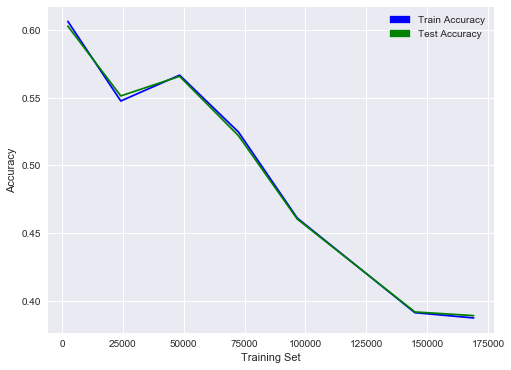

In [19]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Tanh activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 2s 14us/step - loss: 7.4682 - acc: 0.3782
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 12us/step - loss: 7.0685 - acc: 0.3418
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 10us/step - loss: 6.5170 - acc: 0.3252
Epoch 2/2
43488/43488 [==============================] - 0s 8us/step
Epoch 1/2
173952/173952 [==============================] - 2s 11us/step - loss: 5.9947 - acc: 0.3235
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 9us/step - loss: 5.4821 - acc: 0.3213
Epoch 2/2
43488/43488 [==============================] - 0s 4us/step
The accuracy of the neural net with Tanh activation function is 33.00%


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [22]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=2,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/2
2416/2416 [==============================] - 0s 39us/step - loss: 1.4898 - acc: 0.5639
Epoch 2/2
239184/239184 [==============================] - 1s 5us/step
Epoch 1/2
24160/24160 [==============================] - 0s 9us/step - loss: 7.4029 - acc: 0.4310
Epoch 2/2
217440/217440 [==============================] - 1s 4us/step
Epoch 1/2
48320/48320 [==============================] - 0s 10us/step - loss: 7.7507 - acc: 0.3057
Epoch 2/2
193280/193280 [==============================] - 1s 5us/step
Epoch 1/2
72480/72480 [==============================] - 1s 9us/step - loss: 7.8553 - acc: 0.3052
Epoch 2/2
169120/169120 [==============================] - 1s 5us/step
Epoch 1/2
96640/96640 [==============================] - 1s 11us/step - loss: 7.8437 - acc: 0.3059
Epoch 2/2
144960/144960 [==============================] - 1s 5us/step
Epoch 1/2
144960/144960 [==============================] - 1s 10us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
96640/96640 [==============================

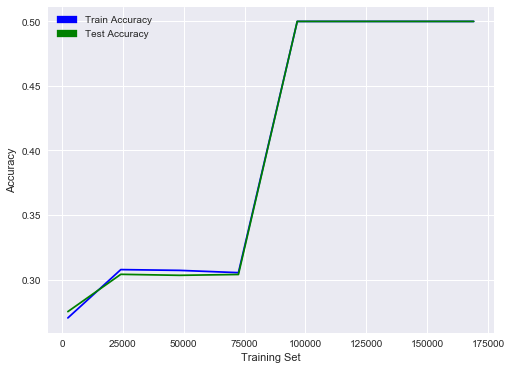

In [23]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Relu activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 2s 10us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 9us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 10us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
Epoch 1/2
173952/173952 [==============================] - 2s 10us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
43488/43488 [==============================] - 0s 6us/step
Epoch 1/2
173952/173952 [==============================] - 2s 11us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
43488/43488 [==============================] - 0s 5us/step
The accuracy of the neural net with Relu activation function is 50.00%


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
nodes_list=[8,16,32,64,128,256]
train_acc = []
test_acc = []
model = Sequential()
for i in nodes_list:
    model.add(Dense(i, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=2)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
169120/169120 [==============================] - 5s 30us/step - loss: 0.6340 - acc: 0.6629
Epoch 2/2
72480/72480 [==============================] - 1s 15us/step
Epoch 1/2
169120/169120 [==============================] - 6s 34us/step - loss: 0.6060 - acc: 0.8042
Epoch 2/2
72480/72480 [==============================] - 1s 17us/step
Epoch 1/2
169120/169120 [==============================] - 6s 37us/step - loss: 0.6061 - acc: 0.8015
Epoch 2/2
72480/72480 [==============================] - 1s 19us/step
Epoch 1/2
169120/169120 [==============================] - 7s 41us/step - loss: 0.5526 - acc: 0.8438
Epoch 2/2
72480/72480 [==============================] - 1s 18us/step
Epoch 1/2
169120/169120 [==============================] - 7s 44us/step - loss: 0.5353 - acc: 0.8374
Epoch 2/2
72480/72480 [==============================] - 2s 24us/step
Epoch 1/2
169120/169120 [==============================] - 9s 55us/step - loss: 0.5326 - acc: 0.8424
Epoch 2/2
72480/72480 [=====================

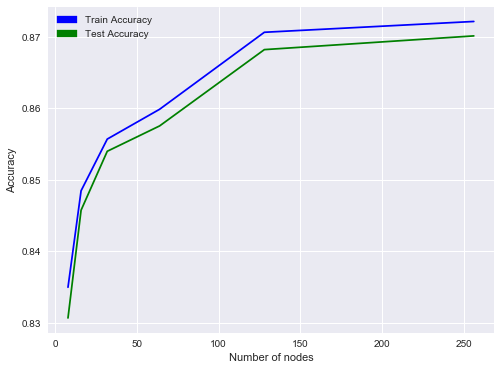

In [26]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(nodes_list, train_acc, color = "blue") 
plt.plot(nodes_list, test_acc, color = "green") 
plt.xlabel("Number of nodes") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
layers_list=[1,2,3,4,5]
train_acc = []
test_acc = []
for i in layers_list:
    model = Sequential()
    for l in range(i):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=2)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/2
169120/169120 [==============================] - 6s 36us/step - loss: 0.5577 - acc: 0.7760
Epoch 2/2
72480/72480 [==============================] - 2s 22us/step
Epoch 1/2
169120/169120 [==============================] - 8s 48us/step - loss: 0.6475 - acc: 0.7144
Epoch 2/2
72480/72480 [==============================] - 2s 21us/step
Epoch 1/2
169120/169120 [==============================] - 9s 51us/step - loss: 0.6914 - acc: 0.5310
Epoch 2/2
72480/72480 [==============================] - 2s 25us/step
Epoch 1/2
169120/169120 [==============================] - 11s 64us/step - loss: 0.6938 - acc: 0.5004
Epoch 2/2
72480/72480 [==============================] - 2s 28us/step
Epoch 1/2
169120/169120 [==============================] - 12s 68us/step - loss: 0.6935 - acc: 0.5008
Epoch 2/2
72480/72480 [==============================] - 2s 27us/step


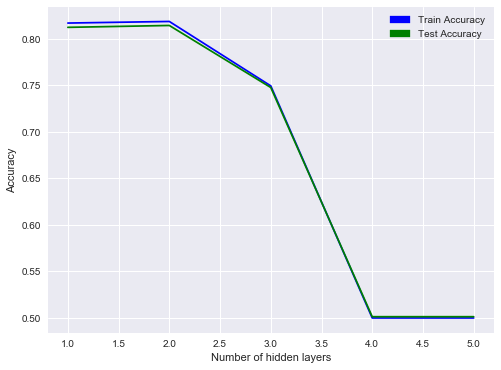

In [28]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(layers_list, train_acc, color = "blue") 
plt.plot(layers_list, test_acc, color = "green") 
plt.xlabel("Number of hidden layers") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
neighbours_list=[1,3,5,7,10,15,17,20,22,25,27,30]
train_acc = []
test_acc = []
for i in neighbours_list:
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(x_train,y_train)
    train_acc.append(knnmodel.score(x_train,y_train))
    test_acc.append(knnmodel.score(x_test,y_test))

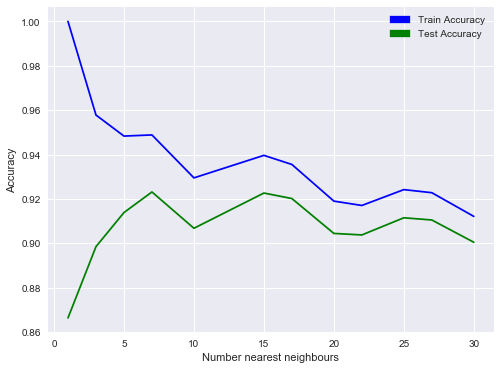

In [30]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(neighbours_list, train_acc, color = "blue") 
plt.plot(neighbours_list, test_acc, color = "green") 
plt.xlabel("Number nearest neighbours") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
knnmodel = KNeighborsClassifier(n_neighbors=25)
for train_index, val_index in kf.split(X_train):
    knnmodel.fit(X_train[train_index], y_train[train_index])
    val_acc.append(knnmodel.score(X_train[val_index],y_train[val_index]))
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the KNN is {0:.2f}%".format(accuracy))

The accuracy of the KNN is 91.41%
